In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
#create the set of random longitudes and latitudes using the np method with the ranom uniform function practice in random_numbers.ipynb
lats = np.random.uniform(-90.000, 90.000, size= 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)

#pack the lats and longs together by zipping them with the zip() function
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list (they have been stored as a zip object)
#you can only unzip a zipped tuple once before it's removed from memory
#so make sure you unzip it into a list right away

coordinates = list(lat_lngs)

In [4]:
#We need to use the citypy module to access the closest cities to given coordinate
#Went to anaconda prompt(python data) installed citpy with "pip install citipy"
#https://github.com/wingchen/citipy for inf0
from citipy import citipy


In [5]:
#create a list for holding cities

cities = []

#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm a sufficent list
len(cities)

607

In [6]:
import requests

In [7]:

#import the API key
from config import weather_api_key


In [8]:
#Starting URL for Weather API Call from https://openweathermap.org/current#name
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
#create an endpoint URL for a city to specify
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather
#create output for request errors in case the url doesnt work and doesnt produce a status of 200
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
#get the text of the 'get'request
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":64.56,"feels_like":63.12,"temp_min":57.99,"temp_max":68,"pressure":1021,"humidity":51},"visibility":10000,"wind":{"speed":3.65,"deg":162,"gust":5.68},"clouds":{"all":43},"dt":1617987565,"sys":{"type":1,"id":4967,"country":"US","sunrise":1617963151,"sunset":1618010311},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
#get the JSON text of the 'get' request, much easier to read and save to a variable
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 64.56,
  'feels_like': 63.12,
  'temp_min': 57.99,
  'temp_max': 68,
  'pressure': 1021,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 3.65, 'deg': 162, 'gust': 5.68},
 'clouds': {'all': 43},
 'dt': 1617987565,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1617963151,
  'sunset': 1618010311},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
#use the 'sys' key from the json text, we see above that the country ID is
#in this key and we can pull that by using the "country" key after
boston_data["sys"]["country"]

'US'

In [14]:
#get all interesting data and save it to variables
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 68 51 43 3.65


In [15]:
#pull the date timestamp from the data
boston_data["dt"]

1617987565

In [16]:
#convert that timestamp into ISO, a standardzed date format
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 4, 9, 16, 59, 25)

In [17]:
#convert the previously acquired ISO date into a readable format using
#the method strftime() that lets you add how you want the string to look
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-04-09 16:59:25'

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters that start at 1 not 0.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
#create a loop through our generated city list to build a url for each city

#for i in range(len(cities)):

#use enumerate() to retrieve both the citie index and city name in the same for loop
for i, city in enumerate(cities):
    #group the cities in dets of 50 for logging purposes
    if (i % 50 == 0 and i > 50):
        set_count +=1
        record_count = 1
    #creat and endpoint url with each city
    city_url = url + "&q=" + cities[i]  
    
    #log the url, record and set numbers and the city name
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Cloudiness": city_clouds,
                          "Country": city_country, 
                          "Date": city_date,  
                          "Humidity": city_humidity,                          
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | myronivka
Processing Record 2 of Set 1 | dibaya
City not found. Skipping...
Processing Record 3 of Set 1 | hidalgo
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | eureka
Processing Record 6 of Set 1 | ugoofaaru
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | farah
Processing Record 10 of Set 1 | beloomut
Processing Record 11 of Set 1 | red bluff
Processing Record 12 of Set 1 | hami
Processing Record 13 of Set 1 | voh
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | puerto baquerizo moreno
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | chara
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of Set 1 | rikitea
Processing Record 24 of Set 1 | busselton
P

Processing Record 41 of Set 3 | lasa
Processing Record 42 of Set 3 | whyalla
Processing Record 43 of Set 3 | mount gambier
Processing Record 44 of Set 3 | bambous virieux
Processing Record 45 of Set 3 | jackson
Processing Record 46 of Set 3 | beloha
Processing Record 47 of Set 3 | samalaeulu
City not found. Skipping...
Processing Record 48 of Set 3 | wencheng
Processing Record 49 of Set 3 | tral
Processing Record 50 of Set 3 | keelung
Processing Record 1 of Set 4 | gao
Processing Record 2 of Set 4 | bandarbeyla
Processing Record 3 of Set 4 | never
Processing Record 4 of Set 4 | sulangan
Processing Record 5 of Set 4 | coihaique
Processing Record 6 of Set 4 | librazhd
Processing Record 7 of Set 4 | saravan
Processing Record 8 of Set 4 | ilulissat
Processing Record 9 of Set 4 | cam pha
City not found. Skipping...
Processing Record 10 of Set 4 | tambilil
Processing Record 11 of Set 4 | belmonte
Processing Record 12 of Set 4 | shelburne
Processing Record 13 of Set 4 | pangody
Processing Rec

Processing Record 31 of Set 7 | takoradi
Processing Record 32 of Set 7 | oistins
Processing Record 33 of Set 7 | rauma
Processing Record 34 of Set 7 | tekeli
Processing Record 35 of Set 7 | baruun-urt
Processing Record 36 of Set 7 | tsivilsk
Processing Record 37 of Set 7 | caxito
Processing Record 38 of Set 7 | bullhead city
Processing Record 39 of Set 7 | macherla
Processing Record 40 of Set 7 | dhidhdhoo
Processing Record 41 of Set 7 | krasnyy chikoy
Processing Record 42 of Set 7 | medicine hat
Processing Record 43 of Set 7 | hasaki
Processing Record 44 of Set 7 | nome
Processing Record 45 of Set 7 | isangel
Processing Record 46 of Set 7 | morro bay
Processing Record 47 of Set 7 | salisbury
Processing Record 48 of Set 7 | nelson bay
Processing Record 49 of Set 7 | johi
Processing Record 50 of Set 7 | yulara
Processing Record 1 of Set 8 | pitsunda
Processing Record 2 of Set 8 | barabinsk
Processing Record 3 of Set 8 | constitucion
Processing Record 4 of Set 8 | husavik
Processing Reco

Processing Record 23 of Set 11 | chapleau
Processing Record 24 of Set 11 | fortuna
Processing Record 25 of Set 11 | gatesville
Processing Record 26 of Set 11 | mweka
Processing Record 27 of Set 11 | dutse
Processing Record 28 of Set 11 | the valley
Processing Record 29 of Set 11 | batagay-alyta
Processing Record 30 of Set 11 | ilo
Processing Record 31 of Set 11 | otavi
Processing Record 32 of Set 11 | gamovo
Processing Record 33 of Set 11 | baculin
Processing Record 34 of Set 11 | araouane
Processing Record 35 of Set 11 | maniitsoq
Processing Record 36 of Set 11 | aripuana
Processing Record 37 of Set 11 | pechora
Processing Record 38 of Set 11 | balkanabat
Processing Record 39 of Set 11 | fojnica
Processing Record 40 of Set 11 | nizhnevartovsk
Processing Record 41 of Set 11 | masindi
Processing Record 42 of Set 11 | aklavik
Processing Record 43 of Set 11 | anadyr
Processing Record 44 of Set 11 | marienburg
Processing Record 45 of Set 11 | konakovo
Processing Record 46 of Set 11 | kartu

In [20]:
len(city_data)

565

In [21]:
#convert this array of dictionaries with city data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Myronivka,84,UA,2021-04-09 17:04:14,53,49.6601,30.9823,42.26,3.11
1,Hidalgo,2,MX,2021-04-09 17:04:14,16,20.5000,-99.0000,81.43,12.12
2,Bluff,92,NZ,2021-04-09 17:04:15,88,-46.6000,168.3333,46.99,1.99
3,Eureka,98,US,2021-04-09 17:04:15,80,40.8021,-124.1637,48.99,5.01
4,Ugoofaaru,17,MV,2021-04-09 17:04:15,72,5.6667,73.0000,82.76,5.68
5,Hobart,90,AU,2021-04-09 17:04:16,58,-42.8794,147.3294,51.80,10.36
6,Ushuaia,40,AR,2021-04-09 17:02:49,57,-54.8000,-68.3000,46.40,16.11
7,Farah,6,AF,2021-04-09 17:04:16,11,32.5000,62.5000,73.24,4.45
8,Beloomut,9,RU,2021-04-09 17:04:16,76,54.9448,39.3394,34.00,2.30
9,Red Bluff,1,US,2021-04-09 17:04:17,47,40.1785,-122.2358,61.00,4.61


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [23]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Myronivka,UA,2021-04-09 17:04:14,49.6601,30.9823,42.26,53,84,3.11
1,Hidalgo,MX,2021-04-09 17:04:14,20.5000,-99.0000,81.43,16,2,12.12
2,Bluff,NZ,2021-04-09 17:04:15,-46.6000,168.3333,46.99,88,92,1.99
3,Eureka,US,2021-04-09 17:04:15,40.8021,-124.1637,48.99,80,98,5.01
4,Ugoofaaru,MV,2021-04-09 17:04:15,5.6667,73.0000,82.76,72,17,5.68
5,Hobart,AU,2021-04-09 17:04:16,-42.8794,147.3294,51.80,58,90,10.36
6,Ushuaia,AR,2021-04-09 17:02:49,-54.8000,-68.3000,46.40,57,40,16.11
7,Farah,AF,2021-04-09 17:04:16,32.5000,62.5000,73.24,11,6,4.45
8,Beloomut,RU,2021-04-09 17:04:16,54.9448,39.3394,34.00,76,9,2.30
9,Red Bluff,US,2021-04-09 17:04:17,40.1785,-122.2358,61.00,47,1,4.61


In [24]:
#create output file (CSV) to store data
output_data_file = "weather_data/cities.csv"

#Export the city_data into the csv with the index label (or column A) 
#header as "City_ID." If we ever need to export the CSV file to a 
#DataFrame, that header will be present in the DataFrame

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [25]:
## Plot Latitude vs Temperature

In [26]:
#extract all relevent fields from the datafram for plotting this relationship
#We'll obviously need the latitude and max temp but also grab humidity, cloudiness and wind speed
#save them to usable variables
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [27]:
#the scatterplot will also need the current date in it so we need to
#import the time module 
import time
#get today's date in seconds
today = time.time()
today

1617988036.368658

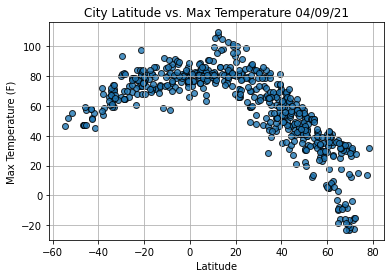

In [28]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig1.png")
#show plot
plt.show()

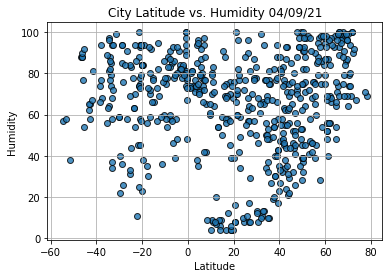

In [29]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig2.png")
#show plot
plt.show()

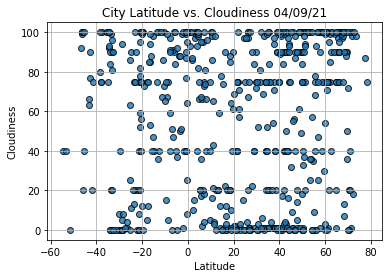

In [30]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig3.png")
#show plot
plt.show()

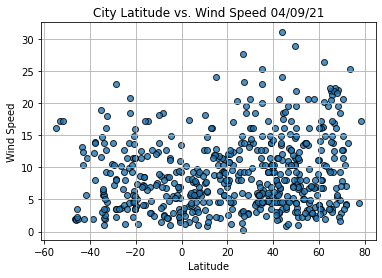

In [31]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig4.png")
#show plot
plt.show()